In [1]:
import pyhepmc
import pandas as pd
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
pid = 1000015 # you also want to include 2000015, remember we talked about how there are two staus?
pids = [1000015,2000015]
#statuses = [22, 51, 52]
staus = []

In [ ]:
nevents=0
with pyhepmc.open("/home/tate/MG5_aMC_v3_5_1/muon_to_stau_decay/Events/run_11/tag_1_pythia8_events.hepmc") as f:
    while True:
        evt = f.read()
        if not evt:
            break
        
        # to speed things up while testing you can do something like
        if nevents > 100: break
        nevents+=1

        for particle in evt.particles #[:10]: look at fewer events but check all particles
            if abs(particle.pid) not in pids : continue # check for all pids
            #if particle.status not in statuses : continue

            decayvtx = particle.end_vertex
            if decayvtx.position.x != 0: #based on fact that none of the long-lived staus have decay x = 0 - but should make this statement more rigorous
                fourvec = decayvtx.position
                products = decayvtx.particles_out
                #print(particle.status)


                stau = {}
            
                particlemom = particle.momentum
                stau["eta"] = particlemom.eta()
                stau["phi"] = particlemom.phi()
                stau["pt" ] = particlemom.pt()
                stau["p"  ] = particlemom.length()
                stau["m"  ] = particlemom.m()
                stau["betagamma"]  = stau["p"]/stau["m"] 
                stau["prodvtx"] = particle.production_vertex.position
                stau["decayvtx"] = fourvec
                stau["decay_x"] = fourvec.x
                stau["decay_y"] = fourvec.y
                stau["decay_z"] = fourvec.z

            
            
                #print(stau)

                staus.append(stau)
        #print(len(staus))

        data = {
            "staus" : staus
        }
    
        #print(data)
        #print(data["staus"][1]["decay_x"])

        #putting stau info into lists
        # suggest to do this in a different cell block
        eta = []
        phi = []
        pt = []
        p = []
        m = []
        betagamma = []
        prodvtx = []
        decay_x = []
        decay_y = []
        decay_z = []
    
        for i in range(0,len(staus)):
            eta.append(data["staus"][i]["eta"])
            phi.append(data["staus"][i]["phi"])
            pt.append(data["staus"][i]["pt"])
            p.append(data["staus"][i]["p"])
            m.append(data["staus"][i]["m"])
            betagamma.append(data["staus"][i]["betagamma"])
            prodvtx.append(data["staus"][i]["prodvtx"])
            decay_x.append(data["staus"][i]["decay_x"])
            decay_y.append(data["staus"][i]["decay_y"])
            decay_z.append(data["staus"][i]["decay_z"])

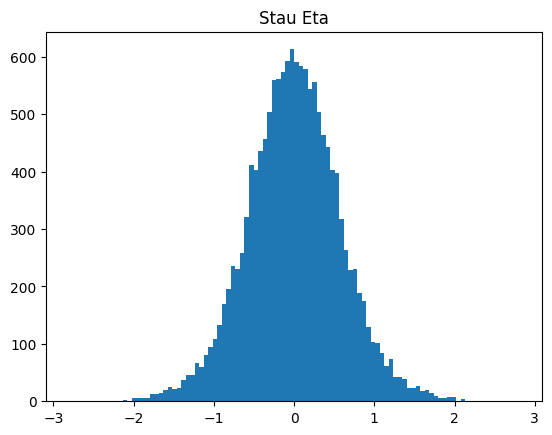

In [ ]:
#initial plots to check
plt.hist(eta, bins=100)
plt.title("Stau Eta")
plt.show()

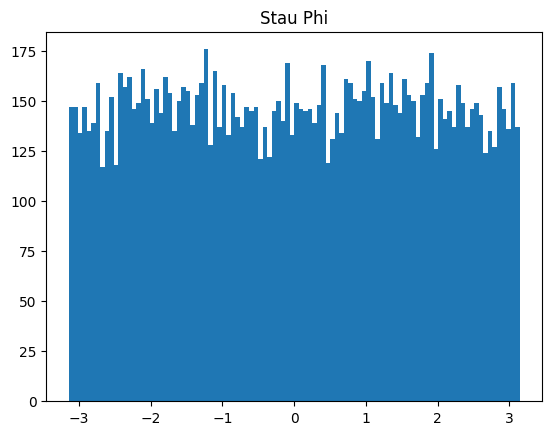

In [ ]:
plt.hist(phi, bins=100)
plt.title("Stau Phi")
plt.show()

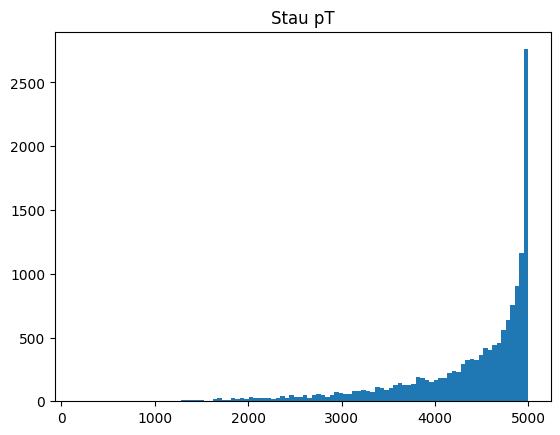

In [ ]:
plt.hist(pt, bins=100)
plt.title("Stau pT")
plt.show()

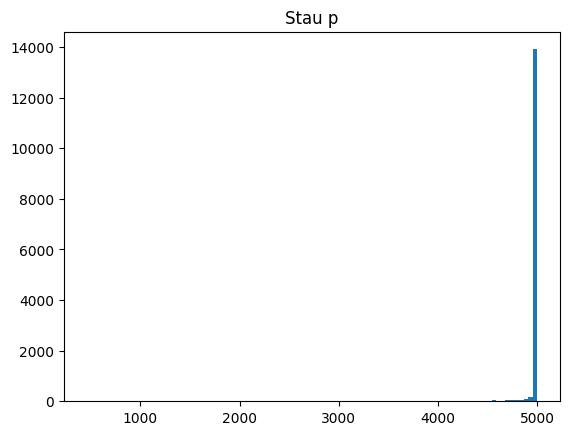

In [ ]:
plt.hist(p, bins=100)
plt.title("Stau p")
plt.show()

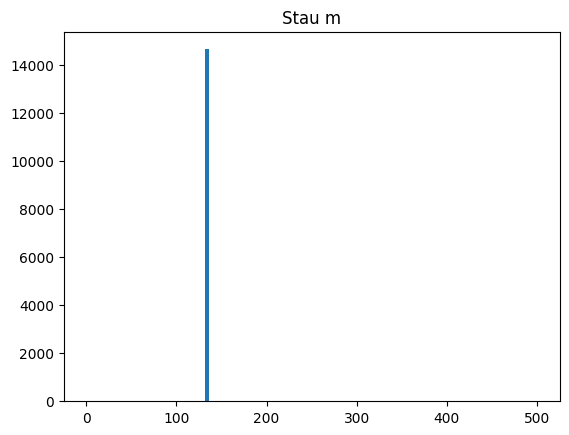

In [ ]:

plt.hist(m, bins=np.linspace(0,500, 100))
plt.title("Stau m")
plt.show()

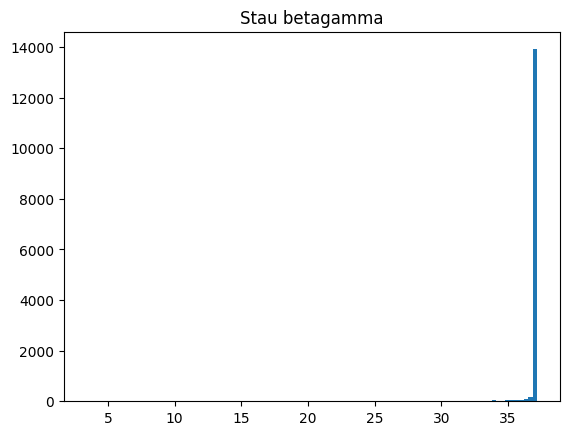

In [ ]:
plt.hist(betagamma, bins=100)
plt.title("Stau betagamma")
plt.show()